In [1]:
import requests
import time
#Data 1: fetching data from the url 
all_data = []   # ← must be OUTSIDE the loop

for i in range(1, 6):
    url = (
        f"https://api.coingecko.com/api/v3/coins/markets"
        f"?vs_currency=inr"
        f"&order=market_cap_desc"
        f"&per_page=250"
        f"&page={i}"
        f"&sparkline=false"
    )

    response = requests.get(url)
    data = response.json()

    print(f"Page {i} → {len(data)} records")

    all_data.extend(data)   # accumulate
    time.sleep(2)

print("Final length:", len(all_data))

Page 1 → 250 records
Page 2 → 250 records
Page 3 → 250 records
Page 4 → 250 records
Page 5 → 250 records
Final length: 1250


In [2]:
data

[{'id': 'bonk-staked-sol',
  'symbol': 'bonksol',
  'name': 'Bonk Staked SOL',
  'image': 'https://coin-images.coingecko.com/coins/images/37473/large/bonksol.jpg?1751787827',
  'current_price': 10691.95,
  'market_cap': 2082064705,
  'market_cap_rank': 1000,
  'fully_diluted_valuation': 2082064705,
  'total_volume': 166127,
  'high_24h': 11240.79,
  'low_24h': 10548.74,
  'price_change_24h': -481.90871193840394,
  'price_change_percentage_24h': -4.31282,
  'market_cap_change_24h': -92667081.80787635,
  'market_cap_change_percentage_24h': -4.26108,
  'circulating_supply': 194732.074451446,
  'total_supply': 194732.074451446,
  'max_supply': None,
  'ath': 30832,
  'ath_change_percentage': -65.78638,
  'ath_date': '2025-10-01T23:52:00.676Z',
  'atl': 9163.16,
  'atl_change_percentage': 15.12117,
  'atl_date': '2025-04-07T06:52:06.222Z',
  'roi': None,
  'last_updated': '2026-02-03T15:39:02.945Z'},
 {'id': 'invesco-qqq-etf-ondo-tokenized-etf',
  'symbol': 'qqqon',
  'name': 'Invesco QQQ E

In [3]:
len(all_data)

1250

In [4]:
#filter the columns required
records = []
for i in all_data:
    records.append(dict(id = i["id"], 
                        symbol = i['symbol'], 
                        name = i['name'], 
                        current_price = i['current_price'], 
                        market_cap = i['market_cap'], 
                        market_cap_rank = i['market_cap_rank'], 
                        total_volume = i['total_volume'], 
                        circulating = i['circulating_supply'], 
                        total_supply = i['total_supply'], 
                        ath = i['ath'], 
                        atl = i['atl'], 
                        last_updated = i['last_updated']))

records     #columns filtered           

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'current_price': 7021150,
  'market_cap': 140210474821209,
  'market_cap_rank': 1,
  'total_volume': 4844658789109,
  'circulating': 19982656.0,
  'total_supply': 19982656.0,
  'ath': 11187013,
  'atl': 3993.42,
  'last_updated': '2026-02-03T15:38:38.787Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'current_price': 207002,
  'market_cap': 24978267506925,
  'market_cap_rank': 2,
  'total_volume': 2616338827256,
  'circulating': 120693657.395343,
  'total_supply': 120693657.395343,
  'ath': 431946,
  'atl': 28.13,
  'last_updated': '2026-02-03T15:38:38.657Z'},
 {'id': 'tether',
  'symbol': 'usdt',
  'name': 'Tether',
  'current_price': 90.21,
  'market_cap': 16720193355248,
  'market_cap_rank': 3,
  'total_volume': 8542428882978,
  'circulating': 185353670778.6412,
  'total_supply': 190820607858.3862,
  'ath': 105.52,
  'atl': 36.86,
  'last_updated': '2026-02-03T15:38:34.655Z'},
 {'id': 'binancecoin',
  '

In [5]:
#convert to DF
import pandas as pd

coin_df = pd.DataFrame(records)
coin_df["last_updated"] = pd.to_datetime(coin_df["last_updated"])
coin_df["last_updated"] = coin_df["last_updated"].dt.date
coin_df 

,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,circulating,total_supply,ath,atl,last_updated
0,bitcoin,btc,Bitcoin,7021150.00,140210474821209,1,4.844659e+12,1.998266e+07,1.998266e+07,11187013.00,3993.420000,2026-02-03
1,ethereum,eth,Ethereum,207002.00,24978267506925,2,2.616339e+12,1.206937e+08,1.206937e+08,431946.00,28.130000,2026-02-03
2,tether,usdt,Tether,90.21,16720193355248,3,8.542429e+12,1.853537e+11,1.908206e+11,105.52,36.860000,2026-02-03
3,binancecoin,bnb,BNB,69757.00,9525560679289,4,1.094759e+11,1.363599e+08,1.363599e+08,121422.00,2.580000,2026-02-03
4,ripple,xrp,XRP,144.93,8820570124078,5,2.620152e+11,6.085323e+10,9.998572e+10,313.99,0.159343,2026-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,makerdao-optimism-bridged-dai-optimism,dai,MakerDAO Optimism Bridged DAI (Optimism),90.08,1353621932,1245,1.635054e+07,1.486371e+07,1.486371e+07,93.84,80.940000,2026-02-03
1246,the-innovation-game,tig,The Innovation Game,51.02,1350764808,1246,3.005742e+08,2.661500e+07,4.730340e+07,364.24,9.920000,2026-02-03
1247,metaplex,mplx,Metaplex,2.57,1348086740,1248,1.322452e+08,5.254669e+08,1.000000e+09,71.48,2.080000,2026-02-03
1248,microstrategy-xstock,mstrx,MicroStrategy xStock,12410.72,1338984696,1250,2.347675e+08,1.078946e+05,5.961993e+05,39865.00,12292.650000,2026-02-03


In [ ]:
#coin_df - 1st data

data 2: Top 3 Historical prices

In [7]:
#data 2 : fetching
coin_id = ["bitcoin", "ethereum", "tether", "binancecoin", "ripple"]
his_prices = []
for i in coin_id:
    url = f"https://api.coingecko.com/api/v3/coins/{i}/market_chart?vs_currency=inr&days=365"
    response = requests.get(url)
    data =  response.json()
   
    for ts, price in data["prices"]:
        his_prices.append({"coin_id" : i, 
                           "prices" : price,
                           "date" : pd.to_datetime(ts, unit = "ms").date()})    #date conversion
his_prices[:5]

[{'coin_id': 'bitcoin',
  'prices': 8821899.22031773,
  'date': datetime.date(2025, 2, 4)},
 {'coin_id': 'bitcoin',
  'prices': 8544188.028439142,
  'date': datetime.date(2025, 2, 5)},
 {'coin_id': 'bitcoin',
  'prices': 8435196.808124574,
  'date': datetime.date(2025, 2, 6)},
 {'coin_id': 'bitcoin',
  'prices': 8465025.732744236,
  'date': datetime.date(2025, 2, 7)},
 {'coin_id': 'bitcoin',
  'prices': 8476794.460583407,
  'date': datetime.date(2025, 2, 8)}]

In [8]:
price_df = pd.DataFrame(his_prices)  #df conversion
price_df

,coin_id,prices,date
0,bitcoin,8.821899e+06,2025-02-04
1,bitcoin,8.544188e+06,2025-02-05
2,bitcoin,8.435197e+06,2025-02-06
3,bitcoin,8.465026e+06,2025-02-07
4,bitcoin,8.476794e+06,2025-02-08
...,...,...,...
1825,ripple,1.588650e+02,2026-01-31
1826,ripple,1.506955e+02,2026-02-01
1827,ripple,1.462114e+02,2026-02-02
1828,ripple,1.465798e+02,2026-02-03


In [10]:
price_df.groupby("coin_id").size()  #checked the count for ref

coin_id
binancecoin    366
bitcoin        366
ethereum       366
ripple         366
tether         366
dtype: int64

#price_df 2nd data

data 3 : OIL prices

In [11]:
#fetch data
import pandas as pd
oil_df = pd.read_csv("https://raw.githubusercontent.com/datasets/oil-prices/main/data/wti-daily.csv")
oil_df

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
10080,2026-01-20,60.30
10081,2026-01-21,60.38
10082,2026-01-22,59.24
10083,2026-01-23,60.70


In [12]:
oil_df["Date"] = pd.to_datetime(oil_df["Date"])  #date conversion
filtered_oil_df = oil_df[
    (oil_df["Date"] >= "2020-01-01") &
    (oil_df["Date"] <= "2026-01-31")]
filtered_oil_df

,Date,Price
8569,2020-01-02,61.17
8570,2020-01-03,63.00
8571,2020-01-06,63.27
8572,2020-01-07,62.70
8573,2020-01-08,59.65
...,...,...
10080,2026-01-20,60.30
10081,2026-01-21,60.38
10082,2026-01-22,59.24
10083,2026-01-23,60.70


In [13]:
#filtered_oil_df ---> five years oil prices df ---> 3rd data

data 4 : Stocks

In [15]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [16]:
#fetching
import yfinance as yf
tickers = ["^GSPC" , "^IXIC", "^NSEI" ]
start_date = "2020-01-01"
end_date = "2025-09-30"

stocks_df = yf.download(tickers, start = start_date, end = end_date, group_by = "ticker")  #dataframe conversion
stocks_df

[*********************100%***********************]  3 of 3 completed


Ticker            ^GSPC                                                       \
Price              Open         High          Low        Close        Volume   
Date                                                                           
2020-01-01          NaN          NaN          NaN          NaN           NaN   
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  3.459930e+09   
2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098  3.484700e+09   
2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029  3.702460e+09   
2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932  3.435910e+09   
...                 ...          ...          ...          ...           ...   
2025-09-23  6692.439941  6699.520020  6645.580078  6656.919922  5.633620e+09   
2025-09-24  6669.790039  6672.660156  6621.759766  6637.970215  5.459180e+09   
2025-09-25  6608.189941  6619.000000  6569.220215  6604.720215  5.874670e+09   
2025-09-26  6615.379883  6648.970215  6604.430176  6643.700195  5.103110e+09   
2025-09-29  6661.580078  6677.310059  6644.490234  6661.209961  5.358760e+09   

Ticker             ^NSEI                                                      \
Price               Open          High           Low         Close    Volume   
Date                                                                           
2020-01-01  12202.150391  12222.200195  12165.299805  12182.500000  304100.0   
2020-01-02  12198.549805  12289.900391  12195.250000  12282.200195  407700.0   
2020-01-03  12261.099609  12265.599609  12191.349609  12226.650391  428800.0   
2020-01-06  12170.599609  12179.099609  11974.200195  11993.049805  396500.0   
2020-01-07  12079.099609  12152.150391  12005.349609  12052.950195  447800.0   
...                  ...           ...           ...           ...       ...   
2025-09-23  25209.000000  25261.900391  25084.650391  25169.500000  299200.0   
2025-09-24  25108.750000  25149.849609  25027.449219  25056.900391  244400.0   
2025-09-25  25034.500000  25092.699219  24878.300781  24890.849609  342500.0   
2025-09-26  24818.550781  24868.599609  24629.449219  24654.699219  291500.0   
2025-09-29  24728.550781  24791.300781  24606.199219  24634.900391  394400.0   

Ticker             ^IXIC                                            \
Price               Open          High           Low         Close   
Date                                                                 
2020-01-01           NaN           NaN           NaN           NaN   
2020-01-02   9039.459961   9093.429688   9010.889648   9092.190430   
2020-01-03   8976.429688   9065.759766   8976.429688   9020.769531   
2020-01-06   8943.500000   9072.410156   8943.500000   9071.469727   
2020-01-07   9076.639648   9091.929688   9042.549805   9068.580078   
...                  ...           ...           ...           ...   
2025-09-23  22782.720703  22785.130859  22539.039062  22573.470703   
2025-09-24  22656.019531  22657.449219  22397.000000  22497.859375   
2025-09-25  22318.769531  22456.779297  22185.869141  22384.699219   
2025-09-26  22403.269531  22488.179688  22285.439453  22484.070312   
2025-09-29  22605.300781  22704.900391  22536.050781  22591.150391   

Ticker                    
Price             Volume  
Date                      
2020-01-01           NaN  
2020-01-02  2.862700e+09  
2020-01-03  2.586520e+09  
2020-01-06  2.810450e+09  
2020-01-07  2.381740e+09  
...                  ...  
2025-09-23  9.822620e+09  
2025-09-24  9.184030e+09  
2025-09-25  9.960330e+09  
2025-09-26  8.488400e+09  
2025-09-29  9.046720e+09  

[1490 rows x 15 columns]

In [17]:
#data fetching separately for every stocks as tables
stocks_df["^GSPC"].reset_index()
stocks_df["^IXIC"].reset_index()
stocks_df["^NSEI"].reset_index()

Price,Date,Open,High,Low,Close,Volume
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,304100.0
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,407700.0
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,428800.0
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,396500.0
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,447800.0
...,...,...,...,...,...,...
1485,2025-09-23,25209.000000,25261.900391,25084.650391,25169.500000,299200.0
1486,2025-09-24,25108.750000,25149.849609,25027.449219,25056.900391,244400.0
1487,2025-09-25,25034.500000,25092.699219,24878.300781,24890.849609,342500.0
1488,2025-09-26,24818.550781,24868.599609,24629.449219,24654.699219,291500.0


In [18]:
#Adding tickers as a column
listed= []

for tickers in stocks_df.columns.levels[0]:
    df_t = stocks_df[tickers].reset_index()
    df_t["Tickers"] = tickers
    listed.append(df_t)


Final_stocks_df = pd.concat(listed,ignore_index = True)

In [19]:
Final_stocks_df  = Final_stocks_df.dropna()          #removing null values
Final_stocks_df 

Price,Date,Open,High,Low,Close,Volume,Tickers
1,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3.459930e+09,^GSPC
2,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3.484700e+09,^GSPC
3,2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3.702460e+09,^GSPC
4,2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3.435910e+09,^GSPC
5,2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3.726840e+09,^GSPC
...,...,...,...,...,...,...,...
4465,2025-09-23,25209.000000,25261.900391,25084.650391,25169.500000,2.992000e+05,^NSEI
4466,2025-09-24,25108.750000,25149.849609,25027.449219,25056.900391,2.444000e+05,^NSEI
4467,2025-09-25,25034.500000,25092.699219,24878.300781,24890.849609,3.425000e+05,^NSEI
4468,2025-09-26,24818.550781,24868.599609,24629.449219,24654.699219,2.915000e+05,^NSEI


Final_stocks_df #stocks data --> 4th data


All tables coin_df price_df filtered_oil_df Final_stocks_df

In [21]:
#SQL CONNECTION using mysql

In [23]:
import pandas as pd
import pymysql

In [24]:
#connection
conn = pymysql.connect(
    host = "localhost",
    port = 3306,
    user = "root",
    password = "tatsavi",
)
cursor = conn.cursor()
cursor.execute("CREATE DATABASE market_data")   #create database
conn.commit()
conn.close()

In [56]:
# #auto creates table columns with data types and appeding the dfs to the tables 
tables = { "crypto_currencies1" : coin_df, "crypto_prices2" : price_df, "oil_prices3" : filtered_oil_df, "stock_prices4" : Final_stocks_df }
for table_name, df in tables.items():
    df.to_sql(
        name = table_name,
        con = engine,
        if_exists = "replace",
        index=False,
    )

pd.read_sql("DROP TABLES crypto_currencies ", engine)

In [62]:
pd.read_sql("SHOW TABLES", engine)  #display tables

,Tables_in_market_data
0,crypto_currencies1
1,crypto_prices2
2,oil_prices3
3,stock_prices4


dataframes were pushed as SQL tables as above

#Queries in SQL

In [86]:
#first df
coin_df

,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,circulating,total_supply,ath,atl,last_updated
0,bitcoin,btc,Bitcoin,7021150.00,140210474821209,1,4.844659e+12,19982656,1.998266e+07,11187013.00,3993.420000,2026-02-03
1,ethereum,eth,Ethereum,207002.00,24978267506925,2,2.616339e+12,120693657,1.206937e+08,431946.00,28.130000,2026-02-03
2,tether,usdt,Tether,90.21,16720193355248,3,8.542429e+12,185353670778,1.908206e+11,105.52,36.860000,2026-02-03
3,binancecoin,bnb,BNB,69757.00,9525560679289,4,1.094759e+11,136359891,1.363599e+08,121422.00,2.580000,2026-02-03
4,ripple,xrp,XRP,144.93,8820570124078,5,2.620152e+11,60853233336,9.998572e+10,313.99,0.159343,2026-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,makerdao-optimism-bridged-dai-optimism,dai,MakerDAO Optimism Bridged DAI (Optimism),90.08,1353621932,1245,1.635054e+07,14863711,1.486371e+07,93.84,80.940000,2026-02-03
1246,the-innovation-game,tig,The Innovation Game,51.02,1350764808,1246,3.005742e+08,26615004,4.730340e+07,364.24,9.920000,2026-02-03
1247,metaplex,mplx,Metaplex,2.57,1348086740,1248,1.322452e+08,525466949,1.000000e+09,71.48,2.080000,2026-02-03
1248,microstrategy-xstock,mstrx,MicroStrategy xStock,12410.72,1338984696,1250,2.347675e+08,107894,5.961993e+05,39865.00,12292.650000,2026-02-03


In [68]:
#Connection
conn = pymysql.connect(
    host = "localhost",
    port = 3306,
    user = "root",
    password = "tatsavi",
)
cursor = conn.cursor()
cursor.execute("Use market_data")

0

In [217]:
#top 3 cryptocurrencies by market cap
query1 = """
SELECT id, symbol, name, market_cap 
FROM crypto_currencies1
ORDER BY market_cap DESC
LIMIT 3; 
"""
cursor.execute(query1)
result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(result)


,id,symbol,name,market_cap
0,bitcoin,btc,Bitcoin,140210474821209
1,ethereum,eth,Ethereum,24978267506925
2,tether,usdt,Tether,16720193355248


In [170]:
#circulating supply exceeds 90% of total supply
query2 = """
SELECT 
    id,
    symbol,
    name,
    circulating,
    total_supply,
    (circulating / total_supply) * 100 AS circulation_pct
FROM crypto_currencies1
WHERE total_supply IS NOT NULL
  AND total_supply > 0
  AND circulating / total_supply > 0.9
ORDER BY circulation_pct DESC;
"""

cursor.execute(query2)
supply_exceed = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(supply_exceed)

,id,symbol,name,circulating,total_supply,circulation_pct
0,wrapped-avax,wavax,Wrapped AVAX,15978008,1.585958e+07,100.746753
1,liquity-usd,lusd,Liquity USD,33188018,3.294652e+07,100.733006
2,dai,dai,Dai,4301490330,4.295623e+09,100.136599
3,wrapped-eeth,weeth,Wrapped eETH,2999007,2.998501e+06,100.016864
4,wrapped-flare,wflr,Wrapped Flare,57056678792,5.705309e+10,100.006283
...,...,...,...,...,...,...
755,axelar,axl,Axelar,1114074881,1.230468e+09,90.540761
756,proton,xpr,XPR Network,28419734200,3.140399e+10,90.497210
757,cartesi,ctsi,Cartesi,902958431,1.000000e+09,90.295843
758,siacoin,sc,Siacoin,56025636522,6.221753e+10,90.047998


In [169]:
#Get coins that are within 10% of their all-time-high (ATH)
query3 = """
SELECT 
    id,
    symbol,
    name,
    current_price,
    ath,
    (current_price/ath) *100 as p_ath
FROM crypto_currencies1 where ath IS NOT NULL
    AND ath > 0
    AND current_price >= 0.9 * ath
order by p_ath;
"""
cursor.execute(query3)
query3_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query3_result)



,id,symbol,name,current_price,ath,p_ath
0,first-digital-usd,fdusd,First Digital USD,90.070000,100.070000,90.006995
1,gaib-ai-dollar-alpha-usdc,aidausdc,Gaib AI Dollar Alpha USDC,90.100000,100.020000,90.081984
2,gama-token,gama,Gama Token,69.010000,76.600000,90.091384
3,micron-technology-ondo-tokenized-stock,muon,Micron Technology (Ondo Tokenized Stock),37816.000000,41937.000000,90.173355
4,bridged-nxpc,nxpc,Bridged NXPC,34.320000,38.050000,90.197109
...,...,...,...,...,...,...
172,mimbogamegroup,mgg,MimboGameGroup,0.243349,0.246983,98.528644
173,aintivirus,ainti,AIntivirus,2.860000,2.890000,98.961938
174,savings-usdd,susdd,Savings USDD,93.190000,93.330000,99.849995
175,usda-2,usda,USDa,90.530000,90.580000,99.944800


In [168]:
#Find the average market cap rank of coins with volume above $1B

query4 = """
Select avg(market_cap_rank)
from crypto_currencies1
where total_volume > 1000000000"""

cursor.execute(query4)
query4_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query4_result)

,avg(market_cap_rank)
0,354.3630


In [167]:
#Get the most recently updated coin.
query5 = """ 
select * from crypto_currencies1
order by last_updated desc
limit 1;
"""

cursor.execute(query5)
query5_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query5_result)

,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,circulating,total_supply,ath,atl,last_updated
0,bitcoin,btc,Bitcoin,7021150.0,140210474821209,1,4.844659e+12,19982656,19982656.0,11187013.0,3993.42,2026-02-03


In [91]:
#second df
price_df

,coin_id,prices,date
0,bitcoin,8.821899e+06,2025-02-04
1,bitcoin,8.544188e+06,2025-02-05
2,bitcoin,8.435197e+06,2025-02-06
3,bitcoin,8.465026e+06,2025-02-07
4,bitcoin,8.476794e+06,2025-02-08
...,...,...,...
1825,ripple,1.588650e+02,2026-01-31
1826,ripple,1.506955e+02,2026-02-01
1827,ripple,1.462114e+02,2026-02-02
1828,ripple,1.465798e+02,2026-02-03


In [166]:
#Find the highest daily price of Bitcoin in the last 365 days

query6 = """
Select max(prices) from crypto_prices2 where coin_id = "bitcoin" ;
"""

cursor.execute(query6)
query6_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query6_result)


,max(prices)
0,1.107047e+07


In [165]:
#Calculate the average daily price of Ethereum in the past 1 year.

query7 = """
Select avg(prices) from crypto_prices2 where coin_id = "ethereum";
"""
cursor.execute(query7)
query7_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query7_result)

,avg(prices)
0,266743.802793


In [227]:
#Show the daily price trend of Bitcoin in March 2025. 

query8 = """
Select * from crypto_prices2 where coin_id = "bitcoin"
and date between '2025-03-01' AND '2025-03-31'
order by date;
"""
cursor.execute(query8)
query8_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query8_result)

,coin_id,prices,date
0,bitcoin,7.386260e+06,2025-03-01
1,bitcoin,7.523009e+06,2025-03-02
2,bitcoin,8.244473e+06,2025-03-03
3,bitcoin,7.521258e+06,2025-03-04
4,bitcoin,7.615008e+06,2025-03-05
5,bitcoin,7.869430e+06,2025-03-06
6,bitcoin,7.841737e+06,2025-03-07
7,bitcoin,7.562231e+06,2025-03-08
8,bitcoin,7.503958e+06,2025-03-09
9,bitcoin,7.035608e+06,2025-03-10


The output was empty, whenn the data was collected for 1 year from Jan. thus no data available in jan 2025. So changed the query to march 2025

In [163]:
#Find the coin with the highest average price over 1 year.

query9 = """

Select coin_id,  (avg(prices)) as average_price 
from crypto_prices2
group by coin_id
order by average_price desc
limit 1;
"""
cursor.execute(query9)
query9_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query9_result)


,coin_id,average_price
0,bitcoin,8.809698e+06


In [228]:
#Get the % change in Bitcoin’s price  between March 2025 & Sep 2025.

query10 = """

SELECT
    ROUND(
        (p2.prices - p1.prices) / p1.prices * 100, 2) AS pct_change
FROM
    (SELECT prices FROM crypto_prices2
     WHERE coin_id='bitcoin' AND date='2025-03-30') p1,
    (SELECT prices FROM crypto_prices2
     WHERE coin_id='bitcoin' AND date='2025-09-30') p2;
"""

cursor.execute(query10)
query10_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query10_result)



,pct_change
0,43.37


In [107]:
#third df
filtered_oil_df

,Date,Price
8569,2020-01-02,61.17
8570,2020-01-03,63.00
8571,2020-01-06,63.27
8572,2020-01-07,62.70
8573,2020-01-08,59.65
...,...,...
10080,2026-01-20,60.30
10081,2026-01-21,60.38
10082,2026-01-22,59.24
10083,2026-01-23,60.70


In [162]:
#Find the highest oil price in the last 5 years.

query11 = """
Select max(Price) from oil_prices3 
;
"""

cursor.execute(query11)
query11_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query11_result)



,max(Price)
0,123.64


In [161]:
#Get the average oil price per year

query12 = """
Select 
YEAR(Date) as Year,
avg(Price) as Avg
from oil_prices3 
Group by YEAR(Date)
order by year
;
"""

cursor.execute(query12)
query12_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query12_result)


,Year,Avg
0,2020,39.160437
1,2021,68.135100
2,2022,94.902869
3,2023,77.576532
4,2024,76.632240
5,2025,65.388105
6,2026,59.167500


In [160]:
#Show oil prices during COVID crash (March–April 2020).
query13 = """
Select *
from oil_prices3 
where Date between '2020-03-01' AND '2020-04-30'
order by Price, Date;
"""

cursor.execute(query13)
query13_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query13_result)


,Date,Price
0,2020-04-20,-36.98
1,2020-04-21,8.91
2,2020-04-27,12.17
3,2020-04-28,12.40
4,2020-04-22,13.64
5,2020-03-30,14.10
6,2020-04-29,15.04
7,2020-04-23,15.06
8,2020-03-27,15.48
9,2020-04-24,15.99


In [225]:
#Find the lowest price of oil in the last 10 years 

query14 = """
Select min(Price)
from oil_prices3 ;
"""

cursor.execute(query14)
query14_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query14_result)

,min(Price)
0,-36.98


In [120]:
#output would be taken from five years and not 10 years, since our data has only five years prices.

In [158]:
#Calculate the volatility of oil prices (max-min difference per year)
 
query15 = """
Select
    YEAR(Date) AS year,
    STDDEV(Price) AS Volatality_per_year
FROM oil_prices3
GROUP BY YEAR(Date)
ORDER BY year;
"""
cursor.execute(query15)
query15_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query15_result)

,year,Volatality_per_year
0,2020,11.536781
1,2021,8.278868
2,2022,12.471599
3,2023,6.056807
4,2024,5.419823
5,2025,5.276085
6,2026,1.555356


In [130]:
#fourth df
Final_stocks_df 

Price,Date,Open,High,Low,Close,Volume,Tickers
1,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3.459930e+09,^GSPC
2,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3.484700e+09,^GSPC
3,2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3.702460e+09,^GSPC
4,2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3.435910e+09,^GSPC
5,2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3.726840e+09,^GSPC
...,...,...,...,...,...,...,...
4465,2025-09-23,25209.000000,25261.900391,25084.650391,25169.500000,2.992000e+05,^NSEI
4466,2025-09-24,25108.750000,25149.849609,25027.449219,25056.900391,2.444000e+05,^NSEI
4467,2025-09-25,25034.500000,25092.699219,24878.300781,24890.849609,3.425000e+05,^NSEI
4468,2025-09-26,24818.550781,24868.599609,24629.449219,24654.699219,2.915000e+05,^NSEI


In [226]:
#Get all stock prices for a given ticker
#considering ticker ^NSEI
query16 = """
SELECT *
FROM stock_prices4
WHERE Tickers = '^NSEI'
"""
cursor.execute(query16)
query16_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query16_result)

,Date,Open,High,Low,Close,Volume,Tickers
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,304100.0,^NSEI
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,407700.0,^NSEI
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,428800.0,^NSEI
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,396500.0,^NSEI
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,447800.0,^NSEI
...,...,...,...,...,...,...,...
1418,2025-09-23,25209.000000,25261.900391,25084.650391,25169.500000,299200.0,^NSEI
1419,2025-09-24,25108.750000,25149.849609,25027.449219,25056.900391,244400.0,^NSEI
1420,2025-09-25,25034.500000,25092.699219,24878.300781,24890.849609,342500.0,^NSEI
1421,2025-09-26,24818.550781,24868.599609,24629.449219,24654.699219,291500.0,^NSEI


In [156]:
#Find the highest closing price for NASDAQ (^IXIC)

query17 = """
SELECT MAX(Close)
FROM stock_prices4
WHERE Tickers = '^IXIC'
"""
cursor.execute(query17)
query17_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query17_result)

,MAX(Close)
0,22788.980469


In [155]:
#List top 5 days with highest price difference (high - low) for S&P 500 (^GSPC)

query18 = """
SELECT
    date,
    high,
    low,
    (high - low) AS price_difference
FROM stock_prices4
WHERE Tickers = '^GSPC'
ORDER BY price_difference DESC
LIMIT 5;
"""
cursor.execute(query18)
query18_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query18_result)


,date,high,low,price_difference
0,2025-04-09,5481.339844,4948.430176,532.909668
1,2025-04-07,5246.569824,4835.040039,411.529785
2,2025-04-08,5267.470215,4910.419922,357.050293
3,2025-04-10,5353.149902,5115.270020,237.879883
4,2025-04-04,5292.140137,5069.899902,222.240234


In [154]:
#Get monthly average closing price for each ticker

query19 = """

SELECT 
Tickers,
MONTH(Date) AS Months, 
AVG(Close) AS Average

FROM stock_prices4
GROUP BY Tickers, Month(Date)
Order By Tickers, Months;
"""

cursor.execute(query19)
query19_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query19_result)

,Tickers,Months,Average
0,^GSPC,1,4397.500432
1,^GSPC,2,4459.357885
2,^GSPC,3,4267.768272
3,^GSPC,4,4325.276050
4,^GSPC,5,4404.895244
5,^GSPC,6,4465.333762
6,^GSPC,7,4653.234244
7,^GSPC,8,4715.818341
8,^GSPC,9,4691.676577
9,^GSPC,10,4351.224670


In [153]:
#Get average trading volume of NSEI in 2024

query20 = """

Select 
Tickers,
year(Date) AS Year,
avg(Volume) AS Trading_Volume_Avg
from stock_prices4
where year(Date) = "2024" AND Tickers = "^NSEI"
group by year(Date)
"""

cursor.execute(query20)
query20_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(query20_result)

,Tickers,Year,Trading_Volume_Avg
0,^NSEI,2024,313560.162602


JOIN QUERIES

In [152]:
#Compare Bitcoin vs Oil average price in 2025.


JQ1 = """

Select 
( SELECT AVG(prices) 
FROM crypto_prices2
WHERE coin_id = 'bitcoin'
AND date BETWEEN '2025-01-01' AND '2025-12-31') As Bitcoin_AVG_Price,

(SELECT AVG(Price)
FROM oil_prices3
WHERE Date BETWEEN '2025-01-01' AND '2025-12-31') AS Oil_AVG_Price;
"""

cursor.execute(JQ1)
JQ1_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(JQ1_result)

,Bitcoin_AVG_Price,Oil_AVG_Price
0,8.884247e+06,65.388105


In [214]:
#Check if Bitcoin moves with S&P 500 (correlation idea)

JQ2 = """
SELECT
    cp.date,
    cp.coin_id,
    cp.prices AS Bitcoin_Price,
    sp.Close as SP500_Price
FROM crypto_prices2 cp
INNER JOIN stock_prices4 sp 
    ON cp.date = sp.Date 
WHERE cp.coin_ID = "bitcoin"
AND sp.Tickers = '^GSPC'
ORDER BY cp.date;
"""
cr_df = pd.read_sql(JQ2, engine)
# Pearson correlation
correlation = cr_df['Bitcoin_Price'].corr(cr_df['SP500_Price'])
correlation

np.float64(0.8887303692025358)

Correlation value > 0 --> positive relationship --> bitcoin prices move with S&P 500 prices

In [177]:
#Compare Ethereum and NASDAQ daily prices for 2025.


JQ3 = """

SELECT
    c.date AS date,
    c.prices AS ethereum_price,
    s.Close AS nasdaq_price
FROM crypto_prices2 c
JOIN stock_prices4 s
  ON c.date = s.Date
WHERE c.coin_id = 'ethereum'
  AND s.Tickers = '^IXIC'
  AND c.date BETWEEN '2025-01-01' AND '2025-12-31'
ORDER BY date;
"""


cursor.execute(JQ3)
JQ3_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(JQ3_result)

,date,ethereum_price,nasdaq_price
0,2025-02-04,250207.637875,19654.019531
1,2025-02-05,238633.334547,19692.330078
2,2025-02-06,243716.640220,19791.990234
3,2025-02-07,235345.031255,19523.400391
4,2025-02-10,230896.439445,19714.269531
...,...,...,...
159,2025-09-23,370875.271422,22573.470703
160,2025-09-24,369992.091901,22497.859375
161,2025-09-25,368312.965606,22384.699219
162,2025-09-26,342937.444019,22484.070312


In [210]:
#Find days when oil price spiked and compare with Bitcoin price change

JQ4 = """
SELECT
    o1.Date,
    -- Oil prices
    o1.Price AS oil_price_today,
    o2.Price AS oil_price_yesterday,
    (o1.Price - o2.Price) AS oil_price_change,

    -- Bitcoin prices
    b1.prices AS bitcoin_price_today,
    b2.prices AS bitcoin_price_yesterday,
    (b1.prices - b2.prices) AS bitcoin_price_change

FROM oil_prices3 o1
INNER JOIN oil_prices3 o2
    ON o1.Date = DATE_ADD(o2.Date, INTERVAL 1 DAY)

INNER JOIN crypto_prices2 b1
    ON o1.Date = b1.date AND b1.coin_id = 'bitcoin'
INNER JOIN crypto_prices2 b2
    ON o2.Date = b2.date AND b2.coin_id = 'bitcoin'

WHERE o1.Price > o2.Price
ORDER BY o1.Date;

"""

cursor.execute(JQ4)
JQ4_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(JQ4_result)




,Date,oil_price_today,oil_price_yesterday,oil_price_change,bitcoin_price_today,bitcoin_price_yesterday,bitcoin_price_change
0,2025-02-07,71.32,70.97,0.35,8.465026e+06,8.435197e+06,29828.924620
1,2025-02-11,73.67,72.73,0.94,8.519902e+06,8.468156e+06,51746.466556
2,2025-02-19,72.58,72.21,0.37,8.297395e+06,8.318633e+06,-21238.847366
3,2025-02-20,72.88,72.58,0.30,8.388982e+06,8.297395e+06,91587.232938
4,2025-02-27,70.62,68.87,1.75,7.314307e+06,7.729282e+06,-414975.267928
...,...,...,...,...,...,...,...
89,2026-01-13,60.85,59.39,1.46,8.214255e+06,8.196363e+06,17891.551589
90,2026-01-14,61.84,60.85,0.99,8.600260e+06,8.214255e+06,386005.972716
91,2026-01-16,59.40,59.13,0.27,8.637203e+06,8.754773e+06,-117569.786651
92,2026-01-21,60.38,60.30,0.08,8.046940e+06,8.414004e+06,-367064.140368


In [183]:
#Compare top 3 coins daily price trend vs Nifty (^NSEI).   #cp - crypto prices, sp - Stock price

JQ5 = """
SELECT
    cp.date,
    cp.coin_id,
    cp.prices AS crypto_price,
    sp.Close AS nifty_price
FROM crypto_prices2 cp

INNER JOIN stock_prices4 sp
    ON cp.date = sp.date
    AND sp.Tickers = '^NSEI'

INNER JOIN (
    SELECT id
    FROM crypto_currencies1
    ORDER BY market_cap DESC
    LIMIT 3
) top3
    ON cp.coin_id = top3.id

ORDER BY cp.date, cp.coin_id;
"""

cursor.execute(JQ5)
JQ5_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(JQ5_result)

,date,coin_id,crypto_price,nifty_price
0,2025-02-04,bitcoin,8.821899e+06,23739.250000
1,2025-02-04,ethereum,2.502076e+05,23739.250000
2,2025-02-04,tether,8.703163e+01,23739.250000
3,2025-02-05,bitcoin,8.544188e+06,23696.300781
4,2025-02-05,ethereum,2.386333e+05,23696.300781
...,...,...,...,...
478,2025-09-26,ethereum,3.429374e+05,24654.699219
479,2025-09-26,tether,8.881435e+01,24654.699219
480,2025-09-29,bitcoin,9.944473e+06,24634.900391
481,2025-09-29,ethereum,3.672861e+05,24634.900391


In [186]:
#Compare stock prices (^GSPC) with crude oil prices on the same dates

JQ6 = """
SELECT
    sp.date,
    sp.Close AS GSPC_prices,
    op.Price as Crude_oil_Price
FROM stock_prices4 sp
INNER JOIN oil_prices3 op 
    ON sp.date = op.Date 
WHERE sp.Tickers = "^GSPC"
ORDER BY sp.date;
"""
cursor.execute(JQ6)
JQ6_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(JQ6_result)

,date,GSPC_prices,Crude_oil_Price
0,2020-01-02,3257.850098,61.17
1,2020-01-03,3234.850098,63.00
2,2020-01-06,3246.280029,63.27
3,2020-01-07,3237.179932,62.70
4,2020-01-08,3253.050049,59.65
...,...,...,...
1432,2025-09-23,6656.919922,63.76
1433,2025-09-24,6637.970215,65.40
1434,2025-09-25,6604.720215,65.51
1435,2025-09-26,6643.700195,66.50


In [196]:
#Correlate Bitcoin closing price with crude oil closing price (same date)

JQ7 = """
SELECT
    cp.date,
    cp.coin_id,
    cp.prices AS bitcoin_price,
    op.Price as Crude_oil_Price
FROM crypto_prices2 cp
INNER JOIN oil_prices3 op 
    ON cp.date = op.Date 
WHERE cp.coin_ID = "bitcoin"
ORDER BY cp.date;
"""
CR = pd.read_sql(JQ7, engine)
# Pearson correlation
correlation = CR['bitcoin_price'].corr(CR['Crude_oil_Price'])
correlation


np.float64(0.06252306424461064)

Correlation value > 0 --> positive relationship --> bitcoin prices move with Crude oil

In [197]:
#Compare NASDAQ (^IXIC) with Ethereum price trends
JQ8 = """

SELECT
    cp.date,
    cp.prices AS ethereum_price,
    sp.Close AS nasdaq_price
FROM crypto_prices2 cp
INNER JOIN stock_prices4 sp
  ON cp.date = sp.Date
WHERE cp.coin_id = 'ethereum'
  AND sp.Tickers = '^IXIC'
ORDER BY cp.date;
"""

cursor.execute(JQ8)
JQ8_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(JQ8_result)


,date,ethereum_price,nasdaq_price
0,2025-02-04,250207.637875,19654.019531
1,2025-02-05,238633.334547,19692.330078
2,2025-02-06,243716.640220,19791.990234
3,2025-02-07,235345.031255,19523.400391
4,2025-02-10,230896.439445,19714.269531
...,...,...,...
159,2025-09-23,370875.271422,22573.470703
160,2025-09-24,369992.091901,22497.859375
161,2025-09-25,368312.965606,22384.699219
162,2025-09-26,342937.444019,22484.070312


In [199]:
correlation = JQ8_result['ethereum_price'].corr(JQ8_result['nasdaq_price'])
correlation

np.float64(0.9219543889228173)

Correlation value > 0 --> positive relationship --> Ethereum prices move with NASDAQ prices

In [200]:
#trends
from matplotlib import pyplot as plt

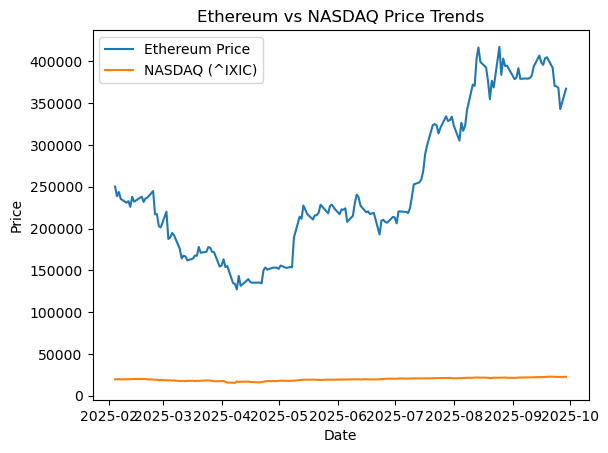

In [202]:
plt.plot(JQ8_result['date'], JQ8_result['ethereum_price'], label='Ethereum Price')
plt.plot(JQ8_result['date'], JQ8_result['nasdaq_price'], label='NASDAQ (^IXIC)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ethereum vs NASDAQ Price Trends')
plt.legend()
plt.show()

In [205]:
#Join top 3 crypto coins with stock indices for 2025
JQ9 = """

SELECT 
    cp.date,
    cp.coin_id,
    cp.prices AS crypto_price,
    sp.Tickers AS stock_index,
    sp.Close AS stock_close
FROM crypto_prices2 cp
INNER JOIN stock_prices4 sp
    ON cp.date = sp.Date 
WHERE cp.coin_id IN ('bitcoin', 'ethereum', 'tether')
  AND sp.Tickers IN ('^GSPC', '^IXIC', '^NSEI')
  AND cp.date BETWEEN '2025-01-01' AND '2025-12-31'
ORDER BY cp.date, cp.coin_id, sp.Tickers;
"""
cursor.execute(JQ9)
JQ9_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(JQ9_result)


,date,coin_id,crypto_price,stock_index,stock_close
0,2025-02-04,bitcoin,8.821899e+06,^GSPC,6037.879883
1,2025-02-04,bitcoin,8.821899e+06,^IXIC,19654.019531
2,2025-02-04,bitcoin,8.821899e+06,^NSEI,23739.250000
3,2025-02-04,ethereum,2.502076e+05,^GSPC,6037.879883
4,2025-02-04,ethereum,2.502076e+05,^IXIC,19654.019531
...,...,...,...,...,...
1462,2025-09-29,ethereum,3.672861e+05,^IXIC,22591.150391
1463,2025-09-29,ethereum,3.672861e+05,^NSEI,24634.900391
1464,2025-09-29,tether,8.870541e+01,^GSPC,6661.209961
1465,2025-09-29,tether,8.870541e+01,^IXIC,22591.150391


In [209]:
#Multi-join: stock prices, oil prices, and Bitcoin prices for daily comparison

JQ10 = """
    SELECT 
        cp.date,
        cp.prices AS Bitcoin_price,
        op.Price as Crude_oil_Price,
        sp.Tickers AS Stock_index,
        sp.Close AS stock_close
    
    FROM crypto_prices2 cp
    
    JOIN oil_prices3 op
        ON cp.date = op.Date 
    JOIN stock_prices4 sp
        ON cp.date = sp.Date 
    WHERE cp.coin_id = 'bitcoin'
      AND sp.Tickers IN ('^GSPC', '^IXIC', '^NSEI')
    ORDER BY cp.date, sp.Tickers;
    
    """
cursor.execute(JQ10)
JQ10_result = pd.DataFrame(cursor.fetchall(), columns=[c[0] for c in cursor.description])
display(JQ10_result)


,date,Bitcoin_price,Crude_oil_Price,Stock_index,stock_close
0,2025-02-04,8.821899e+06,73.04,^GSPC,6037.879883
1,2025-02-04,8.821899e+06,73.04,^IXIC,19654.019531
2,2025-02-04,8.821899e+06,73.04,^NSEI,23739.250000
3,2025-02-05,8.544188e+06,71.39,^GSPC,6061.479980
4,2025-02-05,8.544188e+06,71.39,^IXIC,19692.330078
...,...,...,...,...,...
479,2025-09-26,9.673068e+06,66.50,^IXIC,22484.070312
480,2025-09-26,9.673068e+06,66.50,^NSEI,24654.699219
481,2025-09-29,9.944473e+06,64.27,^GSPC,6661.209961
482,2025-09-29,9.944473e+06,64.27,^IXIC,22591.150391


In [215]:
#Queries Completed